# Robosuite Tutorial

### Adopted from Robosuite Tutorial Fa22 - Zoom Recording

CS391R Robot Learning 

#### Prerequisites
- mujoco physics toolbox
- following dependencies
    - ```sudo apt-get install -y libgl1-mesa-dev libgl1-mesa-glx libglew-dev libosmesa6-dev software-properties-common```
    - ```sudo apt-get install -y patchelf```
- following packages
    - ```pip install robosuite```
    - ```pip install numpy imageio imageio-ffmpeg matplotlib IPython```

In [1]:
import robosuite
import imageio
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import HTML
from base64 import b64encode

### Initialize environments with robosuite

In [2]:
options = {}
options["env_name"] = "Lift" # simplest environment in robosuite
options["controller_configs"] = robosuite.load_controller_config(default_controller="OSC_POSE") 
options["robots"] = "Panda"  # demo robot

In [3]:
env = robosuite.make(
    **options,
    has_renderer=False,          # only has_renderer or has_offscreen_renderer needs to be true
    has_offscreen_renderer=True, # typically used for debug
    ignore_done=True,            # environment will terminate when done, setting to true allows for it not to terminate
    use_camera_obs=True,
    horizon=1000,
    control_freq=20,             # [hz] freq OSC_POSE is running at
    camera_names=["agentview", "robot0_eye_in_hand", "frontview"] # need this to match the images to get observations
)

### Reset the environment and control the robots through API

In [4]:
obs = env.reset()

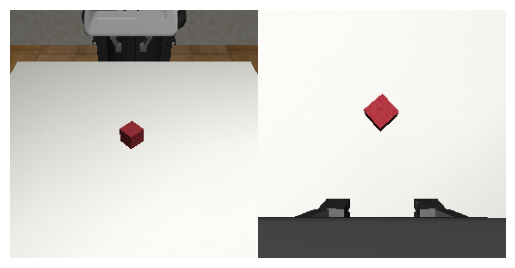

In [5]:
# check image observation
plt.imshow(np.concatenate((obs["agentview_image"][::-1], obs["robot0_eye_in_hand_image"][::-1]), axis=1))
plt.axis("off")
plt.show()

### Example control with random OSC_POSE actions. 
Each OSC_POSE action contains 7 dimensions, 6 arm + 1 gripper

In [6]:
images = []
for _ in range(100):
    obs, reward, done, _ = env.step(np.random.randn(7))
    images.append(obs["frontview_image"][::-1])

# example video
writer = imageio.get_writer('output.mp4', fps=20)
for image in images:
    writer.append_data(image)
writer.close()

mp4 = open('output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video controls>
    <source src="%s" type="video/mp4">
</video>
""" % data_url)